# **Demo KNN con WineQT**

El dataset WineQT contiene información fisicoquímica de distintos vinos tintos, junto con una variable objetivo llamada quality, que representa la calidad del vino evaluada generalmente en una escala numérica (por ejemplo, de 3 a 8).

Las variables incluyen características como acidez, azúcar residual, pH, densidad, sulfatos y contenido de alcohol, todas medidas cuantitativas que describen propiedades químicas del vino.

Este conjunto de datos se utiliza comúnmente en problemas de clasificación o regresión para predecir la calidad del vino en función de sus atributos químicos, siendo especialmente útil para aplicar y comparar algoritmos de aprendizaje supervisado como K-NN, regresión logística o árboles de decisión.

In [3]:
import pandas as pd

df = pd.read_csv("WineQT.csv")

print(df.shape)
df.head()

(1143, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


| Variable                 | Descripción               | Unidad / Qué mide                                                            |
| ------------------------ | ------------------------- | ---------------------------------------------------------------------------- |
| **fixed acidity**        | Acidez fija del vino      | Ácidos no volátiles (g/L). Aporta estructura y frescura.                     |
| **volatile acidity**     | Acidez volátil            | Ácidos que se evaporan fácilmente (g/L). En exceso, genera sabor avinagrado. |
| **citric acid**          | Ácido cítrico             | Pequeñas cantidades aportan frescura y estabilidad (g/L).                    |
| **residual sugar**       | Azúcar residual           | Azúcar que queda tras la fermentación (g/L). Influye en dulzor.              |
| **chlorides**            | Cloruros                  | Cantidad de sal en el vino (g/L). En exceso afecta negativamente el sabor.   |
| **free sulfur dioxide**  | Dióxido de azufre libre   | Conservante que previene oxidación y crecimiento bacteriano (mg/L).          |
| **total sulfur dioxide** | Dióxido de azufre total   | Suma del SO₂ libre y combinado (mg/L).                                       |
| **density**              | Densidad                  | Relacionada con alcohol y azúcar residual (g/cm³).                           |
| **pH**                   | Nivel de acidez           | Escala 0–14. Valores bajos = más ácido.                                      |
| **sulphates**            | Sulfatos                  | Contribuyen a estabilidad y calidad sensorial (g/L).                         |
| **alcohol**              | Porcentaje de alcohol     | % volumen de alcohol.                                                        |
| **quality**              | Calidad del vino (target) | Evaluación sensorial (generalmente 3–8).                                     |


* Todas las variables (menos quality) son numéricas.
* quality es ordinal, pero muchas veces se transforma a:
   * Clasificación binaria ( ≥ 6 bueno / < 6 regular)

* La variable target es:

In [4]:
df["quality"].value_counts()

,count
quality,
5,483
6,462
7,143
4,33
8,16
3,6


**Separar variables**

In [5]:
# Si existe columna Id, la eliminamos:
if "Id" in df.columns:
    df = df.drop("Id", axis=1)

X = df.drop("quality", axis=1)
y = df["quality"]

In [15]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


**Escalar variables**

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Train / Test**

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X_scaled, y,
  test_size=0.30,
  random_state=42,
   stratify=y # le dice a train_test_split que haga la separación manteniendo la misma
              # proporción de clases del target en el set de entrenamiento y en el de prueba.
)

**Modelo base K=3**

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

K (número de vecinos).

Si eliges:

* K=1 → el modelo es muy sensible al ruido. Puede sobreajustar.
* K muy grande → el modelo se vuelve demasiado “suave” y pierde capacidad de discriminar.

K=3 es una forma de decir: “Partimos con algo razonable y luego lo optimizamos”.

**Evaluación**

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5918367346938775


In [23]:
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))


Matriz de confusión:
 [[ 0  0  1  1  0  0]
 [ 1  1  3  5  0  0]
 [ 0  5 97 39  4  0]
 [ 1  3 35 86 13  0]
 [ 0  0  5 19 19  0]
 [ 0  0  2  0  3  0]]


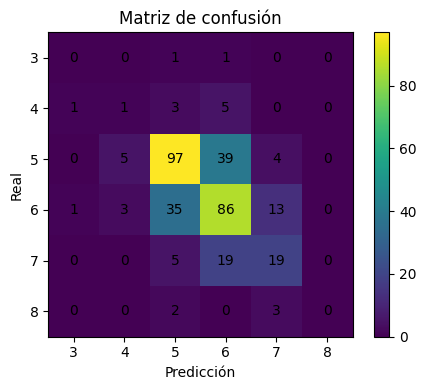

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1) Calcular matriz
cm = confusion_matrix(y_test, y_pred)

# 2) Nombres de clases (opcional)
class_names = sorted(np.unique(np.concatenate([y_test, y_pred])))

# 3) Graficar
plt.figure(figsize=(5,4))
plt.imshow(cm)
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")

plt.xticks(range(len(class_names)), class_names)
plt.yticks(range(len(class_names)), class_names)

# escribir valores dentro de cada celda
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.colorbar()
plt.tight_layout()
plt.show()

Las clases reales son 3, 4, 5, 6, 7, 8 (calidad del vino).

El modelo casi no predice 3, 4 ni 8 (columnas con casi puros ceros). Eso suele pasar porque hay muy pocos ejemplos de esas calidades en el dataset, entonces KNN “se va” a las clases más comunes.

La mayor parte de los aciertos está en la diagonal para 5 y 6 (por ejemplo 97 para 5→5 y 86 para 6→6). Eso es típico: el modelo aprende bien donde hay más datos.

El error más grande está entre 5 y 6, y es lógico: son calidades “vecinas”, se parecen mucho.
Se ve fuerte en:

5 real → 6 predicho = 39

6 real → 5 predicho = 35

Para 7, el modelo se confunde bastante con 6 (19 casos) y algunos sí acierta (19). O sea, 7 está “pegado” a 6 en las variables.

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.11      0.10      0.11        10
           5       0.68      0.67      0.67       145
           6       0.57      0.62      0.60       138
           7       0.49      0.44      0.46        43
           8       0.00      0.00      0.00         5

    accuracy                           0.59       343
   macro avg       0.31      0.31      0.31       343
weighted avg       0.58      0.59      0.59       343



* Precision -> De todo lo que el modelo predijo como clase X, cuánto era realmente X.
* Recall -> De todos los verdaderos casos de clase X, cuántos logró detectar el modelo.
* F1-score -> Es el equilibrio entre precision y recall.
    Si uno es alto y el otro muy bajo, el F1 baja.
* Support -> Cuántos ejemplos reales hay de esa clase en el test set.

* El macro avg calcula el promedio de la métrica (precision, recall, F1) tratando todas las clases por igual.

    Es bajo, porque:
     * Las clases 3 y 8 están completamente mal clasificadas.
     * Aunque tengan pocos ejemplos, el macro las castiga igual.

* Weighted avg mide desempeño global considerando el desbalance.

Detalle: El modelo funciona moderadamente bien en las clases más frecuentes (5 y 6), pero es muy malo en las clases raras (3 y 8).

**Buscar mejor K (1–20)**

In [32]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

k_values = range(1, 21)
scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    cv_score = cross_val_score(model, X_scaled, y, cv=5).mean()
    scores.append(cv_score)

best_k = k_values[np.argmax(scores)]

print("Mejor K:", best_k)
print("Mejor score:", max(scores))

Mejor K: 16
Mejor score: 0.5520684900022983


k es la cantidad de vecinos más cercanos que se usan para decidir la clase.

**Visualizar impacto de K**

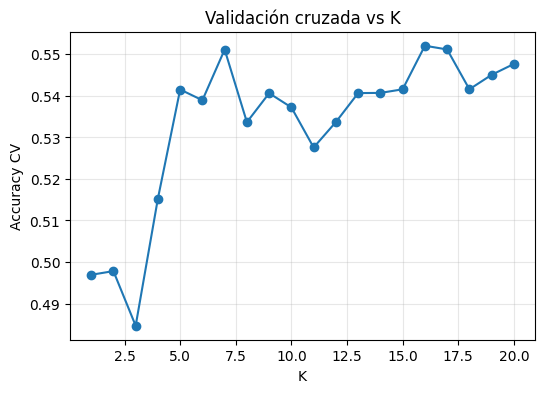

In [36]:
plt.figure(figsize=(6,4))
plt.plot(k_values, scores, marker='o')
plt.xlabel("K")
plt.ylabel("Accuracy CV")
plt.title("Validación cruzada vs K")
plt.grid(alpha=0.3)
plt.show()

**¿Qué está diciendo la curva?**
1. K muy pequeño (1 - 3)
   * Performance baja e inestable.
   * K=3 está en una zona baja (~0.48 - 0.49).
   * Modelo con mucha varianza (muy sensible al ruido).

2. Zona intermedia (5 - 10)
   * Mejora notable.
   * Se estabiliza cerca de 0.53–0.55.
   * Empieza a suavizar decisiones.

3. Zona 14 - 18
   * Aquí está el máximo (~0.55).
   * Modelo más estable.
   * Mejor desempeño promedio.

**¿qué significa esto para K=3?**

* Es demasiado pequeño para este dataset.
* El modelo está sobreajustando.
* Está reaccionando a vecinos muy locales.
* No generaliza bien.

Por eso su rendimiento es inferior al de K más grande.

**Modelo final**

In [12]:
modelo_final = KNeighborsClassifier(n_neighbors=best_k)
modelo_final.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=16)

## **Transformar el problema a binario (vino “bueno” vs “no tan bueno”).**

La regla será:

* 1 (bueno) si quality >= 6
* 0 (no tan bueno) si quality < 6

**Cargar y crear target binario**

In [38]:
import pandas as pd

df = pd.read_csv("WineQT.csv")

# quitar Id si existe
if "Id" in df.columns:
    df = df.drop(columns=["Id"])

# target binario
df["bueno"] = (df["quality"] >= 6).astype(int)

X = df.drop(columns=["quality", "bueno"])
y = df["bueno"]

y.value_counts()

,count
bueno,
1,621
0,522


**Train/Test + escalamiento**

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=3))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

**Evaluación (accuracy + matriz + reporte)**

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6822157434402333


In [42]:
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))


Matriz de confusión:
 [[100  57]
 [ 52 134]]


In [43]:
print("\nClassification report:\n", classification_report(y_test, y_pred, zero_division=0))


Classification report:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65       157
           1       0.70      0.72      0.71       186

    accuracy                           0.68       343
   macro avg       0.68      0.68      0.68       343
weighted avg       0.68      0.68      0.68       343



In [44]:
import numpy as np
from sklearn.model_selection import cross_val_score

k_values = range(1, 31)
scores = []

for k in k_values:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])
    cv_score = cross_val_score(model, X, y, cv=5, scoring="f1").mean()
    scores.append(cv_score)

best_k = k_values[np.argmax(scores)]
print("Mejor K:", best_k)
print("Mejor F1 CV:", max(scores))

Mejor K: 30
Mejor F1 CV: 0.7449274050373511


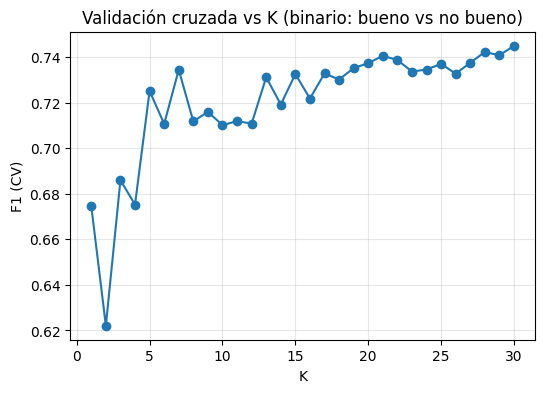

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(list(k_values), scores, marker="o")
plt.xlabel("K")
plt.ylabel("F1 (CV)")
plt.title("Validación cruzada vs K (binario: bueno vs no bueno)")
plt.grid(alpha=0.3)
plt.show()

**Entrenar modelo final con el mejor K y re-evaluar en test**

In [46]:
final_model = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=best_k))
])

final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)

print("Accuracy final:", accuracy_score(y_test, y_pred_final))
print("\nMatriz de confusión final:\n", confusion_matrix(y_test, y_pred_final))
print("\nReporte final:\n", classification_report(y_test, y_pred_final, zero_division=0))

Accuracy final: 0.7405247813411079

Matriz de confusión final:
 [[103  54]
 [ 35 151]]

Reporte final:
               precision    recall  f1-score   support

           0       0.75      0.66      0.70       157
           1       0.74      0.81      0.77       186

    accuracy                           0.74       343
   macro avg       0.74      0.73      0.74       343
weighted avg       0.74      0.74      0.74       343



**Conclusión:**

El modelo KNN logra un 74% de precisión al distinguir vinos buenos vs no tan buenos. Presenta buen equilibrio entre ambas clases, con mejor desempeño en la detección de vinos de calidad alta (recall 81%). No muestra problemas de desbalance.
